Parte 1. Apartado A:

In [1]:
import numpy as np
import numpy.ma as ma
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Pasamos el fichero a una lista (una línea por item)
with open('words.txt') as f:
    dictionary = f.read().splitlines()

# El diccionario cargado lo pasamos en el parámetro vocabulary    
vectorizer = CountVectorizer(vocabulary=dictionary, stop_words='english')

feature_names = vectorizer.get_feature_names()

print(len(feature_names))

466551


In [2]:
import pandas as pd

data= pd.read_csv("yelp_labelled.txt",sep="\t",names=["frase","tipo"])

In [3]:
print(data)

                                                 frase  tipo
0                             Wow... Loved this place.     1
1                                   Crust is not good.     0
2            Not tasty and the texture was just nasty.     0
3    Stopped by during the late May bank holiday of...     1
4    The selection on the menu was great and so wer...     1
..                                                 ...   ...
995  I think food should have flavor and texture an...     0
996                           Appetite instantly gone.     0
997  Overall I was not impressed and would not go b...     0
998  The whole experience was underwhelming, and I ...     0
999  Then, as if I hadn't wasted enough of my life ...     0

[1000 rows x 2 columns]


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

x_train, x_test, y_train, y_test = train_test_split(data.frase,data.tipo, test_size=0.25)


In [38]:
vectorizer1 = CountVectorizer(stop_words='english', binary=False, ngram_range=(1,1))
vectorizer2 = CountVectorizer(stop_words='english', binary=False, ngram_range=(1,2))
vectorizer3 = CountVectorizer(stop_words='english', binary=True, ngram_range=(1,1))
vectorizer4 = CountVectorizer(stop_words='english', binary=True, ngram_range=(1,2))

In [39]:
tfidfer = TfidfTransformer()

# train 1
train_vector_data1 = vectorizer1.fit_transform(x_train)
train_vector_data1 = vectorizer1.transform(x_train)
train_preprocessed1 = tfidfer.fit_transform(train_vector_data1)
# test 1
test_vector_data1 = vectorizer1.fit_transform(x_train)
test_vector_data1 = vectorizer1.transform(x_test)
test_preprocessed1 = tfidfer.fit_transform(test_vector_data1)
# train 2
train_vector_data2 = vectorizer2.fit_transform(x_train)
train_vector_data2 = vectorizer2.transform(x_train)
train_preprocessed2 = tfidfer.fit_transform(train_vector_data2)
# test 2
test_vector_data2 = vectorizer2.fit_transform(x_train)
test_vector_data2 = vectorizer2.transform(x_test)
test_preprocessed2 = tfidfer.fit_transform(test_vector_data2)
# train 3
train_vector_data3 = vectorizer3.fit_transform(x_train)
train_vector_data3 = vectorizer3.transform(x_train)
# test 3
test_vector_data3 = vectorizer3.fit_transform(x_train)
test_vector_data3 = vectorizer3.transform(x_test)
# train 4 
train_vector_data4 = vectorizer4.fit_transform(x_train)
train_vector_data4 = vectorizer4.transform(x_train)
# test 4
test_vector_data4 = vectorizer4.fit_transform(x_train)
test_vector_data4 = vectorizer4.transform(x_test)


In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

mnb_classifier = MultinomialNB()
mnb_classifier.fit(train_preprocessed1,y_train)
mnb_train_predictions1 = mnb_classifier.predict(train_preprocessed1)
mnb_test_predictions1 = mnb_classifier.predict(test_preprocessed1)                                                                                                           
print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions1 == y_train))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions1 == y_test))


mnb_classifier.fit(train_preprocessed2,y_train)
mnb_train_predictions2 = mnb_classifier.predict(train_preprocessed2)
mnb_test_predictions2 = mnb_classifier.predict(test_preprocessed2)                                                                                                            
print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions2 == y_train))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions2 == y_test))


gsn_classifier = GaussianNB()
gsn_classifier.fit(train_preprocessed3.toarray(),y_train)
gsn_train_predictions1 = gsn_classifier.predict(train_preprocessed3.toarray())
gsn_test_predictions1 = gsn_classifier.predict(test_preprocessed3.toarray())
print("Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(gsn_train_predictions1 == y_train))
print("Gaussian Naive Bayes, porcentaje de aciertos en test:", np.mean(gsn_test_predictions1 == y_test))



gsn_classifier.fit(train_preprocessed4.toarray(),y_train)
gsn_train_predictions2 = gsn_classifier.predict(train_preprocessed4.toarray())
gsn_test_predictions2 = gsn_classifier.predict(test_preprocessed4.toarray())
print("Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(gsn_train_predictions2 == y_train))
print("Gaussian Naive Bayes, porcentaje de aciertos en test:", np.mean(gsn_test_predictions2 == y_test))


Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.964
Multinomial Naive Bayes, porcentaje de aciertos en test: 0.756
Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9933333333333333
Multinomial Naive Bayes, porcentaje de aciertos en test: 0.76
Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento: 0.952
Gaussian Naive Bayes, porcentaje de aciertos en test: 0.652
Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9733333333333334
Gaussian Naive Bayes, porcentaje de aciertos en test: 0.656


In [68]:
from sklearn import tree
import numpy as np

# Creamos el clasificador con los valores por defecto
tree_classifier1 = tree.DecisionTreeClassifier()
tree_classifier1.fit(train_preprocessed1, y_train)

tree_train_predictions1 = tree_classifier1.predict(train_preprocessed1)
tree_test_predictions1 = tree_classifier1.predict(test_preprocessed1)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions1 == y_train))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions1 == y_test))

tree_classifier2 = tree.DecisionTreeClassifier()
tree_classifier2.fit(train_preprocessed2, y_train)

tree_train_predictions2 = tree_classifier.predict(train_preprocessed2)
tree_test_predictions2 = tree_classifier.predict(test_preprocessed2)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions2 == y_train))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions2 == y_test))

tree_classifier3 = tree.DecisionTreeClassifier()
tree_classifier3.fit(train_preprocessed3, y_train)

tree_train_predictions3 = tree_classifier.predict(train_preprocessed3)
tree_test_predictions3 = tree_classifier.predict(test_preprocessed3)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions3 == y_train))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions3 == y_test))



Árbol, porcentaje de aciertos en entrenamiento: 0.9973333333333333
Árbol, porcentaje de aciertos en test: 0.736
Árbol, porcentaje de aciertos en entrenamiento: 0.8493333333333334
Árbol, porcentaje de aciertos en test: 0.728


In [69]:
from sklearn.model_selection import cross_validate
import numpy as np

train_accuracy = []
test_accuracy = []

max_depths = range(1, 10)
for md in max_depths: 
    scores = cross_validate(tree_classifier1, train_preprocessed1, y_train, scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))

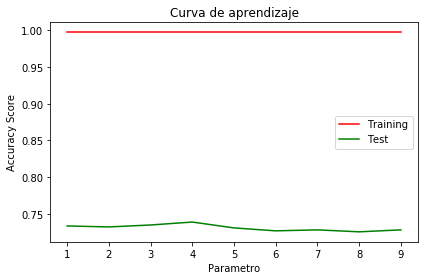

In [70]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()  